In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [329]:
df=pd.read_csv("TaxiFare.csv")
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [330]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [331]:
df.shape

(50000, 8)

In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [333]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [334]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [335]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [336]:
from math import radians, cos,sin, asin,sqrt

def dist(lon1, lon2, lat1 , lat2):
    
    
    lon1 =radians(lon1)
    lon2 =radians(lon2)
    lat1 =radians(lat1)
    lat2 =radians(lat2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    
    r = 6371
    return(round (c * r, 2))

d=[]
for i in range(df.shape[0]):
    d.append(dist(df["latitude_of_pickup"][i],
                 df["latitude_of_dropoff"][i],
                 df["longitude_of_pickup"][i],
                 df["longitude_of_dropoff"][i]))
    
df["distance in kms"]=d

df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance in kms
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.41
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,4.63
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.00
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.91
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.36


In [337]:
df=df.drop(['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff'],axis=1)
df.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance in kms
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,1,0.41
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,1,4.63
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,2,1.00
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,1,0.91
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,1,1.36


In [338]:
df["date_time_of_pickup"] = pd.to_datetime(df["date_time_of_pickup"])
df.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance in kms
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,0.41
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,4.63
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,1.00
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,0.91
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,1.36


In [339]:
df.dtypes

unique_id                           object
amount                             float64
date_time_of_pickup    datetime64[ns, UTC]
no_of_passenger                      int64
distance in kms                    float64
dtype: object

In [340]:
week_names = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}

df["weekday_name"] = df["date_time_of_pickup"].dt.weekday.map(week_names)
df

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance in kms,weekday_name
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,0.41,Sunday
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,4.63,Monday
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,1.00,Wednesday
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,0.91,Friday
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,1.36,Monday
...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15+00:00,1,2.29,Tuesday
49996,19:18.0,7.5,2015-06-22 17:19:18+00:00,1,0.37,Sunday
49997,53:00.0,6.9,2011-01-30 04:53:00+00:00,1,0.80,Saturday
49998,09:00.0,4.5,2012-11-06 07:09:00+00:00,2,0.82,Monday


In [341]:
week_names_encode = {"Sunday": 1, "Saturday": 2, "Monday": 3, "Tuesday": 4, "Friday": 5, "Wednesday": 6, "Thursday": 7}
df["weekday_name"] = df["weekday_name"].map(week_names_encode)
df

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance in kms,weekday_name
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,0.41,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,4.63,3
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,1.00,6
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,0.91,5
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,1.36,3
...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15+00:00,1,2.29,4
49996,19:18.0,7.5,2015-06-22 17:19:18+00:00,1,0.37,1
49997,53:00.0,6.9,2011-01-30 04:53:00+00:00,1,0.80,2
49998,09:00.0,4.5,2012-11-06 07:09:00+00:00,2,0.82,3


In [342]:
df['Date'] = df['date_time_of_pickup'].dt.day
df['Hour'] = df['date_time_of_pickup'].dt.hour
df['Minute'] = df['date_time_of_pickup'].dt.minute
df.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance in kms,weekday_name,Date,Hour,Minute
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,0.41,1,15,17,26
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,4.63,3,5,16,52
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,1.00,6,18,0,35
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,0.91,5,21,4,30
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,1.36,3,9,7,51


In [343]:
df=df.drop(['date_time_of_pickup','unique_id'],axis=1)
df.head()

,amount,no_of_passenger,distance in kms,weekday_name,Date,Hour,Minute
0,4.5,1,0.41,1,15,17,26
1,16.9,1,4.63,3,5,16,52
2,5.7,2,1.00,6,18,0,35
3,7.7,1,0.91,5,21,4,30
4,5.3,1,1.36,3,9,7,51


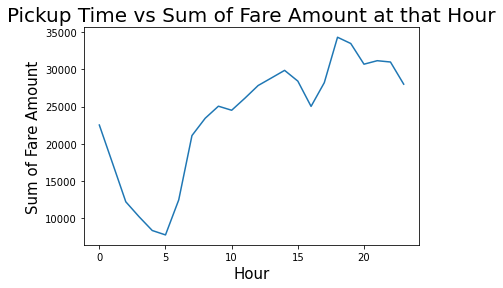

In [344]:
plt.title("Pickup Time vs Sum of Fare Amount at that Hour", fontsize=20)
plt.xlabel("Hour", fontsize=15)
plt.ylabel("Sum of Fare Amount", fontsize=15)
df.groupby("Hour")["amount"].sum().plot()
plt.show()

In [345]:
# Sum of Taxi Fare in a particular day

for day in list(df["Date"].sort_values().unique()):
    print(f"Date : {day} \t Total fare Amount : ${round(df[df.Date==day].amount.sum(), 2)}")

Date : 1 	 Total fare Amount : $17229.03
Date : 2 	 Total fare Amount : $17711.51
Date : 3 	 Total fare Amount : $17887.56
Date : 4 	 Total fare Amount : $16871.76
Date : 5 	 Total fare Amount : $18426.86
Date : 6 	 Total fare Amount : $18898.4
Date : 7 	 Total fare Amount : $19953.12
Date : 8 	 Total fare Amount : $19773.47
Date : 9 	 Total fare Amount : $19096.83
Date : 10 	 Total fare Amount : $19103.29
Date : 11 	 Total fare Amount : $18543.99
Date : 12 	 Total fare Amount : $20143.27
Date : 13 	 Total fare Amount : $19773.21
Date : 14 	 Total fare Amount : $18941.62
Date : 15 	 Total fare Amount : $19425.37
Date : 16 	 Total fare Amount : $19864.5
Date : 17 	 Total fare Amount : $19498.61
Date : 18 	 Total fare Amount : $19117.84
Date : 19 	 Total fare Amount : $19866.99
Date : 20 	 Total fare Amount : $18862.46
Date : 21 	 Total fare Amount : $20123.13
Date : 22 	 Total fare Amount : $18670.33
Date : 23 	 Total fare Amount : $18803.67
Date : 24 	 Total fare Amount : $18053.6
Date

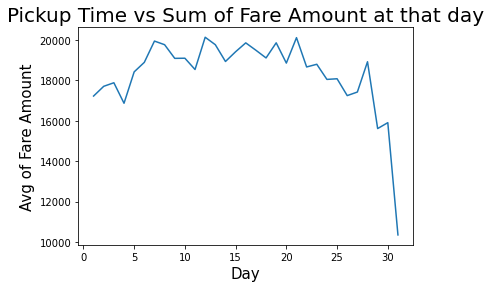

In [384]:
df.groupby("Date")["amount"].sum().plot()
plt.title("Pickup Time vs Sum of Fare Amount at that day", fontsize=20)
plt.xlabel("Day", fontsize=15)
plt.ylabel("Avg of Fare Amount", fontsize=15)
plt.show()

In [346]:
df["no_of_passenger"].value_counts()

1    34808
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: no_of_passenger, dtype: int64

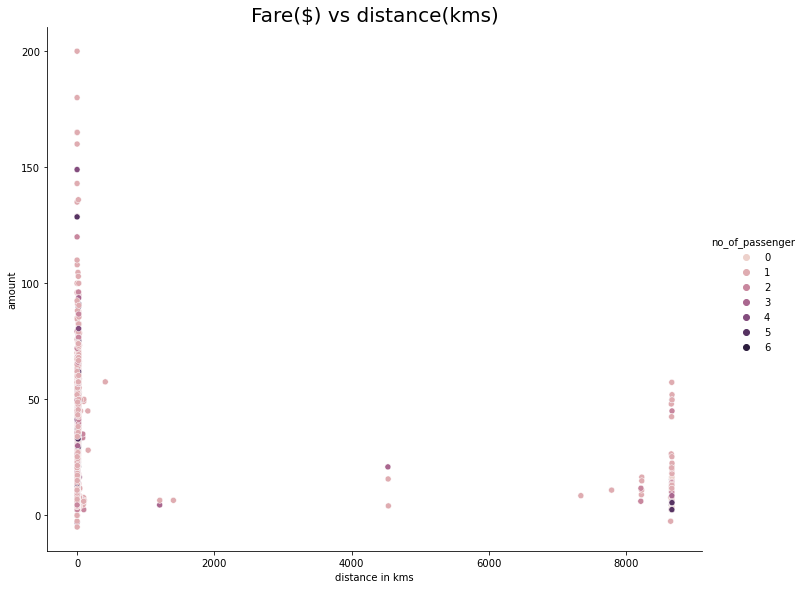

In [347]:
## Graph - Fare vs Distance

sns.relplot(data = df, kind = "scatter",x = "distance in kms",y = "amount",
            hue = "no_of_passenger",height=8 ,aspect = 1.25,)
plt.title("Fare($) vs distance(kms)" , fontsize=20)
plt.show()


In [348]:
df.head()

,amount,no_of_passenger,distance in kms,weekday_name,Date,Hour,Minute
0,4.5,1,0.41,1,15,17,26
1,16.9,1,4.63,3,5,16,52
2,5.7,2,1.00,6,18,0,35
3,7.7,1,0.91,5,21,4,30
4,5.3,1,1.36,3,9,7,51


In [349]:
df1=pd.read_csv("data_transformed.csv")
df1.head()

,amount,no_of_passenger,distance in kms,weekday_name,Date,Hour,Minute
0,4.5,1,0.41,1,15,17,26
1,16.9,1,4.63,3,5,16,52
2,5.7,2,1.00,6,18,0,35
3,7.7,1,0.91,5,21,4,30
4,5.3,1,1.36,3,9,7,51


In [350]:
##Approach 1 (Linear Regression with Scaling)

In [351]:
from scipy.stats import zscore
df_z=df1.apply(zscore)
df_z

,amount,no_of_passenger,distance in kms,weekday_name,Date,Hour,Minute
0,-0.708709,-0.518034,-0.048853,-1.561934,-0.077596,0.539571,-0.211796
1,0.571561,-0.518034,-0.037152,-0.557901,-1.232237,0.385888,1.290542
2,-0.584812,0.257652,-0.047217,0.948149,0.268796,-2.073052,0.308244
3,-0.378317,-0.518034,-0.047467,0.446132,0.615188,-1.458317,0.019333
4,-0.626111,-0.518034,-0.046219,-0.557901,-0.770381,-0.997266,1.232759
...,...,...,...,...,...,...,...
49995,0.375390,-0.518034,-0.043640,-0.055884,-0.423989,1.461674,-0.269578
49996,-0.398966,-0.518034,-0.048964,-1.561934,0.730652,0.539571,-0.616272
49997,-0.460915,-0.518034,-0.047772,-1.059918,1.654365,-1.458317,1.348324
49998,-0.708709,0.257652,-0.047716,-0.557901,-1.116773,-0.997266,-1.194094


In [352]:
from sklearn.model_selection import train_test_split 

In [353]:
X=df_z.drop("amount",axis=1)
y=df_z["amount"]

In [354]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=1)

In [355]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [356]:
model_lr.score(X_train,y_train)

0.001541978144052658

In [357]:
model_lr.score(X_test,y_test)

0.0001025519895142546

In [358]:
### Approach 2 (Linear Regression without Scaling)

In [359]:
X=df1.drop("amount",axis=1)
y=df1["amount"]
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=100)

In [360]:
model_lr1=LinearRegression()
model_lr1.fit(X_train,y_train)

LinearRegression()

In [361]:
model_lr1.score(X_train,y_train)

0.0012030164144034572

In [362]:
model_lr1.score(X_test,y_test)

0.0009348706088287972

In [363]:
from sklearn.tree import DecisionTreeRegressor

In [364]:
model=DecisionTreeRegressor(max_depth=6,criterion="mse")
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6)

In [365]:
model.score(X_train,y_train)

0.674891266239713

In [366]:
model.score(X_test,y_test)

0.6730594257938114

In [367]:
from sklearn.ensemble import BaggingRegressor

In [368]:
model_br=BaggingRegressor(n_estimators=150,base_estimator=model,random_state=100)
model_br=model_br.fit(X_train,y_train)

In [369]:
model_br.score(X_train,y_train)

0.6841530533548081

In [370]:
model_br.score(X_test,y_test)

0.6875585873148367

In [371]:
from sklearn.ensemble import AdaBoostRegressor

In [372]:
model_abr=AdaBoostRegressor(n_estimators=400,random_state=100)
model_abr=model_abr.fit(X_train,y_train)

In [373]:
model_abr.score(X_train,y_train)

0.39729183855365

In [374]:
model_abr.score(X_test,y_test)

0.36391281751300586

In [375]:
from sklearn.ensemble import GradientBoostingRegressor

In [376]:
model_gr=GradientBoostingRegressor(n_estimators=50,random_state=100,max_depth=3,learning_rate=0.35)
model_gr=model_gr.fit(X_train,y_train)

In [377]:
model_gr.score(X_train,y_train)

0.6886550294009081

In [378]:
model_gr.score(X_test,y_test)

0.6858801104857811

In [379]:
from sklearn.ensemble import RandomForestRegressor

In [380]:
model_rf=RandomForestRegressor(n_estimators=300,random_state=100,max_depth=7,max_features=6)
model_rf=model_rf.fit(X_train,y_train)

In [381]:
model_rf.score(X_train,y_train)

0.7007070117548013

In [382]:
model_rf.score(X_test,y_test)

0.6859626271237023